##*Import required libraries*

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2

##*Configurations*


In [ ]:
config={'img1_path' : "/content/1.bmp",
        'img2_path' :"/content/2.bmp",
         'img3_path' : "/content/3.bmp" 
        }

##*Load images*

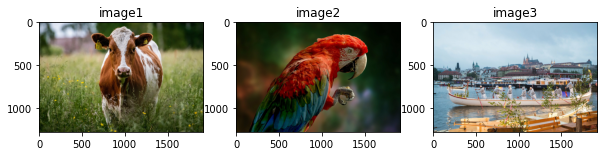

In [ ]:
img1=np.array(plt.imread(config['img1_path']),dtype=float)
img2=np.array(plt.imread(config['img2_path']),dtype=float)
img3=np.array(plt.imread(config['img3_path']),dtype=float)
#-------------------

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)


ax1.imshow(img1.astype(np.int32))
ax1.set_title("image1")
ax2.imshow(img2.astype(np.int32))
ax2.set_title("image2")
ax3.imshow(img3.astype(np.int32))
ax3.set_title("image3")
plt.show()

##*approximate matrix by k biggest singular_values*

In [ ]:
def apx(matrix:np.ndarray , k:int)->np.ndarray : 
  u, s, vh = np.linalg.svd(matrix, full_matrices=True)
  approximated_matrix=np.zeros_like(matrix)
  u_k=u[:,:k]
  vh_k=vh[:k,:]
  s_k=np.diag(s[:k])
  approximated_matrix=np.matmul(u_k,np.matmul(s_k,vh_k))
 
  return approximated_matrix    

##*approximate image by k biggest singular_values*

In [ ]:
def approximate_image(img,k:int):
    r,g,b=cv2.split(img)
    r_new=apx(np.array(r),k)
    g_new=apx(np.array(g),k)
    b_new=apx(np.array(b),k)
    new_image=cv2.merge((r_new,g_new,b_new))
    return new_image

##*Main*

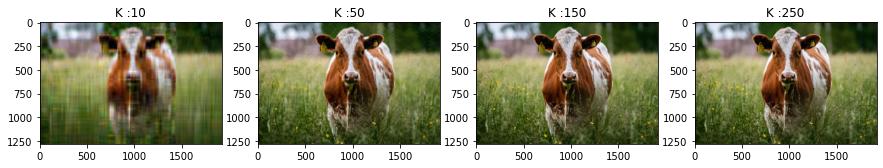

In [ ]:
fig = plt.figure(figsize=(15,5))
list_ax=[]
ax1 = fig.add_subplot(141)
list_ax.append(ax1)
ax2 = fig.add_subplot(142)
list_ax.append(ax2)
ax3 = fig.add_subplot(143)
list_ax.append(ax3)
ax4 = fig.add_subplot(144)
list_ax.append(ax4)
#-------------------------
list_k=[10,50,150,250]
for i,k in enumerate(list_k):
  reduced_image=approximate_image(img1,k)
  list_ax[i].imshow(reduced_image.astype(np.int16))
  list_ax[i].set_title(f"K :{k}")

plt.show()